# **Índice de Sentimento V1**

In [2]:
import numpy as np
import pandas as pd
import os

## *Sentimentos*

In [78]:
sent = pd.read_csv('./data/sentimentos/noticias_sentimentos.csv')
sent['Data'] = pd.to_datetime(sent['Data'], format='%Y-%m-%d')
sent.loc[sent['Sentimento'] == 'POSITIVE', 'Score Signal'] = sent.loc[sent['Sentimento'] == 'POSITIVE', 'Score']
sent.loc[sent['Sentimento'] == 'NEGATIVE', 'Score Signal'] = sent.loc[sent['Sentimento'] == 'NEGATIVE', 'Score'] * -1
sent.loc[sent['Sentimento'] == 'NEUTRAL', 'Score Signal'] = 0
sent

,Data,Notícia,Sentimento,Score,Score Signal
0,2024-09-03,Unipar e MELVER estão com inscrições abertas p...,NEUTRAL,0.700441,0.000000
1,2024-09-03,Mercado financeiro hoje: Vale (VALE3) em busca...,NEGATIVE,0.515265,-0.515265
2,2024-09-03,Briga entre X e STF pode afastar investidores ...,NEGATIVE,0.850306,-0.850306
3,2024-09-03,Podcast | Fechamento de Mercado - 03/09/2024,NEUTRAL,0.614209,0.000000
4,2024-09-03,Comentario semanal - Perspectivas,NEUTRAL,0.610426,0.000000
...,...,...,...,...,...
84846,2024-09-03,Bolsa recua com peso da Vale e dados nos EUA; ...,NEGATIVE,0.830644,-0.830644
84847,2024-09-03,PIB do Brasil cresce acima do esperado no 2º t...,POSITIVE,0.772979,0.772979
84848,2024-09-03,Investidores estrangeiros ingressam com R$ 10 ...,POSITIVE,0.731023,0.731023
84849,2024-09-03,Expert XP: como é ser um investidor de curto p...,NEUTRAL,0.667090,0.000000


In [79]:
# ### Código antigo Guigas ###

# sentimentos_g = []
# sentimentos_t = []
# for data in sent['Data'].unique():
#     dia = sent[sent['Data'] == data]
#     if dia['Sentimento'].value_counts().shape[0] != 1:
#         total_dia_g = dia[dia['Sentimento'] != 'NEUTRAL']['Score'].sum() + dia[dia['Sentimento'] == 'NEUTRAL']['Score'].sum() * 0.5
#         total_dia_t = len(dia[dia['Sentimento'] != 'NEUTRAL']) + len(dia[dia['Sentimento'] == 'NEUTRAL']) * 0.5
#         soma_dia = dia['Score Signal'].sum()
#         sentimentos_g.append(soma_dia/total_dia_g)
#         sentimentos_t.append(soma_dia/total_dia_t)
#     else:
#         media = dia['Score Signal'].mean()
#         sentimentos_g.append(media)         
#         sentimentos_t.append(media)
        
# sentimentos_df = pd.DataFrame(sentimentos_g, index=sent['Data'].unique())
# sentimentos_df.columns = ['Sentimento Guigas']
# sentimentos_df['Sentimento Theozão'] = sentimentos_t
# sentimentos_df.describe()

In [80]:
def indicador_sentimento(freq='D'):
    def agg_score(group):
        if group['Sentimento'].nunique() > 1:
            signal = group['Score Signal'].sum() / group['Score Modificado'].sum()
            return signal
        else:
            return group['Score Signal'].mean()

    sent['Score Modificado'] = np.where(sent['Sentimento'] == "NEUTRAL", 0.5, 1) * sent['Score']
    sentimentos_df = sent.resample(freq, on='Data').apply(agg_score).to_frame(name='Signal')
    return sentimentos_df

sentimentos_df = indicador_sentimento(freq="W")

c:\Users\Andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


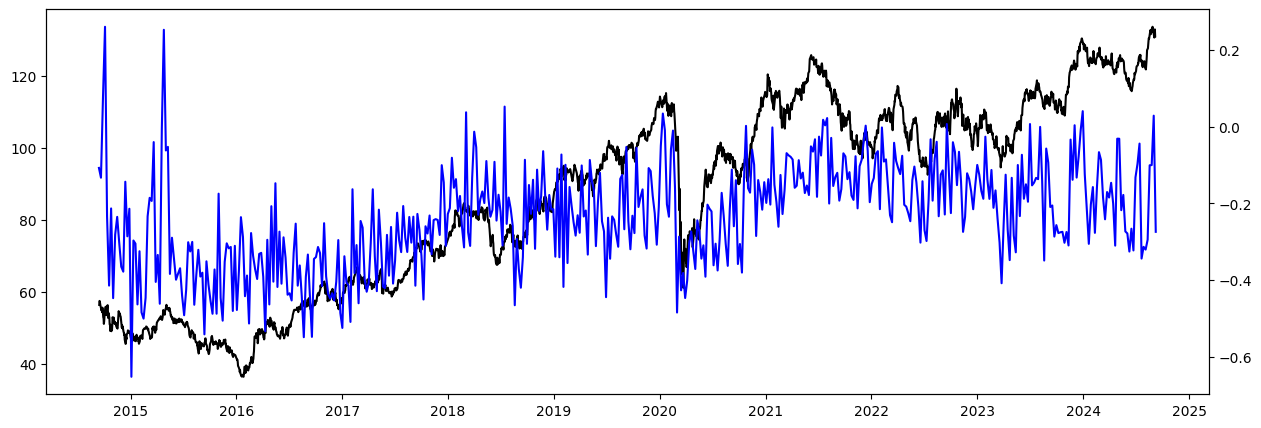

In [81]:
import matplotlib.pyplot as plt
import yfinance as yf

ticker = 'BOVA11.SA'

dados = yf.download(ticker, start=min(sentimentos_df.index), end=max(sentimentos_df.index))['Adj Close']

fig, ax = plt.subplots(figsize=(15, 5))

ax2 = ax.twinx()
ax.plot(dados, color='black')
ax2.plot(sentimentos_df['Signal'], color='blue')

plt.show()

In [82]:
dados_agg = dados.resample('W').mean()
df_dados = dados_agg.to_frame().merge(sentimentos_df, left_on='Date', right_on='Data', how='left')
df_dados['Signal'].corr(df_dados['Adj Close'])

0.5745814689809323

In [10]:
sentimentos_df.to_csv('./data/news/sentimentos.csv')

# Organizar, Juntar e Normalizar os dados

In [13]:
import pandas as pd
import numpy as np

vix = pd.read_excel('./data/vix/PerformanceGraphExport.xls')
vol = pd.read_excel('./data/vix/IVol-BR.xls')
vol_mom = pd.read_csv('./data/momentum_vol/ibov_vol_rsi.csv')
sent = pd.read_csv('./data/sentimentos/noticias_sentimentos.csv')
trends = pd.read_csv('./data/trends/interesses_google.csv')

In [14]:
import datetime as dt

vix['Data'] = pd.to_datetime(vix['Effective date '])
vol['Data'] = vol[['year', 'month', 'day']].apply(lambda x: dt.datetime(x.iloc[0], x.iloc[1], x.iloc[2]), axis=1)
vol_mom['Data'] = pd.to_datetime(vol_mom['Date'])
trends['Data'] = pd.to_datetime(trends['date'])
sent['Data'] = pd.to_datetime(sent['Data'])

start = sent['Data'].min().strftime('%Y-%m-%d')
end = sent['Data'].max().strftime('%Y-%m-%d')
print(f'{start} - {end}')

2014-09-08 - 2024-09-08


In [15]:
sent.loc[sent['Sentimento'] == 'POSITIVE', 'Score Signal'] = sent.loc[sent['Sentimento'] == 'POSITIVE', 'Score']
sent.loc[sent['Sentimento'] == 'NEGATIVE', 'Score Signal'] = sent.loc[sent['Sentimento'] == 'NEGATIVE', 'Score'] * -1
sent.loc[sent['Sentimento'] == 'NEUTRAL', 'Score Signal'] = 0

def indicador_sentimento(df, freq='D'):
    def agg_score(group):
        if group['Sentimento'].nunique() > 1:
            signal = group['Score Signal'].sum() / group['Score Modificado'].sum()
            return signal
        else:
            return group['Score Signal'].mean()

    df['Score Modificado'] = np.where(df['Sentimento'] == "NEUTRAL", 0.5, 1) * df['Score']
    sentimentos_df = df.resample(freq, on='Data').apply(agg_score).to_frame(name='Signal')
    return sentimentos_df

sent = indicador_sentimento(sent)

In [24]:
vix['ivolbr'] = vix['S&P/B3 Ibovespa VIX']
vix_total = pd.concat([vix, vol])[['Data', 'ivolbr']].sort_values('Data')
vix_total.drop_duplicates(subset='Data', inplace=True)

,Data,ivolbr
0,2011-08-01,21.287107
1,2011-08-02,23.567432
2,2011-08-03,27.325140
3,2011-08-04,NaN
4,2011-08-05,29.760391
...,...,...
744,2024-08-15,14.460000
745,2024-08-16,15.680000
746,2024-08-19,16.070000
747,2024-08-20,15.700000


In [18]:
df = pd.merge_ordered(vix_total, vol_mom, on='Data', how='outer')
df = pd.merge_ordered(df, sent, on='Data', how='outer')
df = pd.merge_ordered(df, trends, on='Data', how='outer')

df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

C:\Users\Andre\AppData\Local\Temp\ipykernel_17048\1051337680.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Andre\AppData\Local\Temp\ipykernel_17048\1051337680.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [19]:
df.drop(columns=['Date', 'date'], inplace=True)
df.set_index('Data', inplace=True)
df['trends'] = df.drop(columns=['ivolbr', 'RSI_14', 'Volume', 'Signal']).mean(axis=1)
df = df[['ivolbr', 'RSI_14', 'Volume', 'Signal', 'trends']]
df = df[(df.index >= start) & (df.index <= end)]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2014-09-08 to 2024-09-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ivolbr  3654 non-null   float64
 1   RSI_14  3654 non-null   float64
 2   Volume  3654 non-null   float64
 3   Signal  3654 non-null   float64
 4   trends  3654 non-null   float64
dtypes: float64(5)
memory usage: 171.3 KB


In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.read_csv('./data/indicadores/indicadores.csv')

cols_to_scale = ['ivolbr', 'Volume', 'Signal']
cols_not_to_scale = df.columns[df.columns != 'Data'][~df.columns[df.columns != 'Data'].isin(cols_to_scale)]

scaled_data = []
step = 252

for idx in range(step-1, len(df)):
    grupo = df.iloc[idx - step + 1:idx + 1, df.columns.get_indexer(cols_to_scale)]
    scaled_grupo = scaler.fit_transform(grupo)
    non_scaled_values = df.iloc[idx][cols_not_to_scale].values
    scaled_data.append(list(scaled_grupo[-1]) + list(non_scaled_values))

scaled_df = pd.DataFrame(scaled_data, columns=list(cols_to_scale) + list(cols_not_to_scale), index=df.iloc[step-1:].index)

scaled_df['Data'] = df.iloc[step-1:]['Data'].values

scaled_df.head()

,ivolbr,Volume,Signal,RSI_14,trends,Data
251,0.086642,0.169503,0.569611,62.494222,2.810345,2015-05-17
252,0.043212,0.313317,0.464255,54.222463,2.810345,2015-05-18
253,0.074838,0.222962,0.580549,49.465619,2.810345,2015-05-19
254,0.160838,0.232023,0.134349,45.795663,2.810345,2015-05-20
255,0.169499,0.236090,0.333761,47.281883,2.810345,2015-05-21


In [25]:
scaled_df[cols_to_scale] = scaled_df[cols_to_scale] * 100
scaled_df
# Alterar lado
# scaled_df[['ivolbr', 'RSI_14']] = 100 - scaled_df[['ivolbr', 'RSI_14']]

,ivolbr,Volume,Signal,RSI_14,trends,Data
251,8.664162,16.950283,56.961117,62.494222,2.810345,2015-05-17
252,4.321185,31.331750,46.425522,54.222463,2.810345,2015-05-18
253,7.483823,22.296154,58.054924,49.465619,2.810345,2015-05-19
254,16.083801,23.202317,13.434859,45.795663,2.810345,2015-05-20
255,16.949932,23.609032,33.376132,47.281883,2.810345,2015-05-21
...,...,...,...,...,...,...
3649,36.567164,51.198778,54.128967,63.178803,21.431034,2024-09-04
3650,36.567164,40.921518,46.459318,64.435415,21.431034,2024-09-05
3651,36.567164,41.109583,36.244440,54.540971,21.431034,2024-09-06
3652,36.567164,41.109583,37.373794,54.540971,21.431034,2024-09-07


In [26]:
scaled_df.describe()

,ivolbr,Volume,Signal,RSI_14,trends
count,3403.000000,3403.000000,3403.000000,3403.000000,3403.000000
mean,35.615310,47.228611,44.113990,52.950507,20.869339
std,22.099071,18.395319,18.575732,12.174211,9.860192
min,0.000000,0.000000,0.000000,19.487411,2.603448
25%,19.849108,35.389165,30.592405,44.183848,12.689655
50%,31.651551,47.148452,42.731543,52.406432,22.948276
75%,49.600298,58.501142,56.161362,61.665818,26.862069
max,100.000000,100.000000,100.000000,84.282462,46.534483


# *Índice de Sentimento*

EmotiWand = 0.25(Volatilidade) + 0.25(Momentum e Volume) + 0.40(Sentimentos) + 0.10(Trends)

In [41]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/indicadores/indicadores_scaled.csv")
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

df['indicador'] = 0.25 * df['ivolbr'] + 0.25 * ((df['Volume'] + df['RSI_14']) / 2) + 0.4 * df['Signal'] + 0.1 * df['trends']

In [42]:
df.describe()

,ivolbr,Volume,Signal,RSI_14,trends,indicador
count,3403.000000,3403.000000,3403.000000,3403.000000,3403.000000,3403.000000
mean,35.615310,47.228611,44.113990,52.950507,20.869339,41.158747
std,22.099071,18.395319,18.575732,12.174211,9.860192,9.746093
min,0.000000,0.000000,0.000000,19.487411,2.603448,12.788560
25%,19.849108,35.389165,30.592405,44.183848,12.689655,34.183385
50%,31.651551,47.148452,42.731543,52.406432,22.948276,40.985656
75%,49.600298,58.501142,56.161362,61.665818,26.862069,47.794206
max,100.000000,100.000000,100.000000,84.282462,46.534483,79.842501


In [66]:
df_movel = df['indicador'].resample("W").mean()

In [91]:
df_total

,Adj Close,ivolbr,Volume,Signal,RSI_14,trends,indicador
0,54.490002,4.321185,31.331750,46.425522,54.222463,2.810345,30.625816
1,53.930000,7.483823,22.296154,58.054924,49.465619,2.810345,34.344182
2,53.340000,16.083801,23.202317,13.434859,45.795663,2.810345,18.300676
3,53.549999,16.949932,23.609032,33.376132,47.281883,2.810345,26.730335
4,52.930000,17.794431,29.878961,31.158835,42.872135,2.810345,26.287063
...,...,...,...,...,...,...,...
2287,131.100006,36.567164,19.926731,37.100324,60.266425,21.431034,36.149169
2288,130.630005,36.567164,47.844591,21.602752,56.807139,21.431034,33.007461
2289,132.380005,36.567164,51.198778,54.128967,63.178803,21.431034,47.233679
2290,132.889999,36.567164,40.921518,46.459318,64.435415,21.431034,43.038238


In [95]:
df

,ivolbr,Volume,Signal,RSI_14,trends,indicador
Data,,,,,,
2015-05-17,8.664162,16.950283,56.961117,62.494222,2.810345,35.162085
2015-05-18,4.321185,31.331750,46.425522,54.222463,2.810345,30.625816
2015-05-19,7.483823,22.296154,58.054924,49.465619,2.810345,34.344182
2015-05-20,16.083801,23.202317,13.434859,45.795663,2.810345,18.300676
2015-05-21,16.949932,23.609032,33.376132,47.281883,2.810345,26.730335
...,...,...,...,...,...,...
2024-09-04,36.567164,51.198778,54.128967,63.178803,21.431034,47.233679
2024-09-05,36.567164,40.921518,46.459318,64.435415,21.431034,43.038238
2024-09-06,36.567164,41.109583,36.244440,54.540971,21.431034,37.738990


In [103]:
df_total = pd.merge_asof(dados, df, left_index=True, right_index=True)
df_total

,Adj Close,ivolbr,Volume,Signal,RSI_14,trends,indicador
Date,,,,,,,
2015-05-18,54.490002,4.321185,31.331750,46.425522,54.222463,2.810345,30.625816
2015-05-19,53.930000,7.483823,22.296154,58.054924,49.465619,2.810345,34.344182
2015-05-20,53.340000,16.083801,23.202317,13.434859,45.795663,2.810345,18.300676
2015-05-21,53.549999,16.949932,23.609032,33.376132,47.281883,2.810345,26.730335
2015-05-22,52.930000,17.794431,29.878961,31.158835,42.872135,2.810345,26.287063
...,...,...,...,...,...,...,...
2024-09-02,131.100006,36.567164,19.926731,37.100324,60.266425,21.431034,36.149169
2024-09-03,130.630005,36.567164,47.844591,21.602752,56.807139,21.431034,33.007461
2024-09-04,132.380005,36.567164,51.198778,54.128967,63.178803,21.431034,47.233679


c:\Users\Andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Correlação de ivolbr: -0.25066373491934724


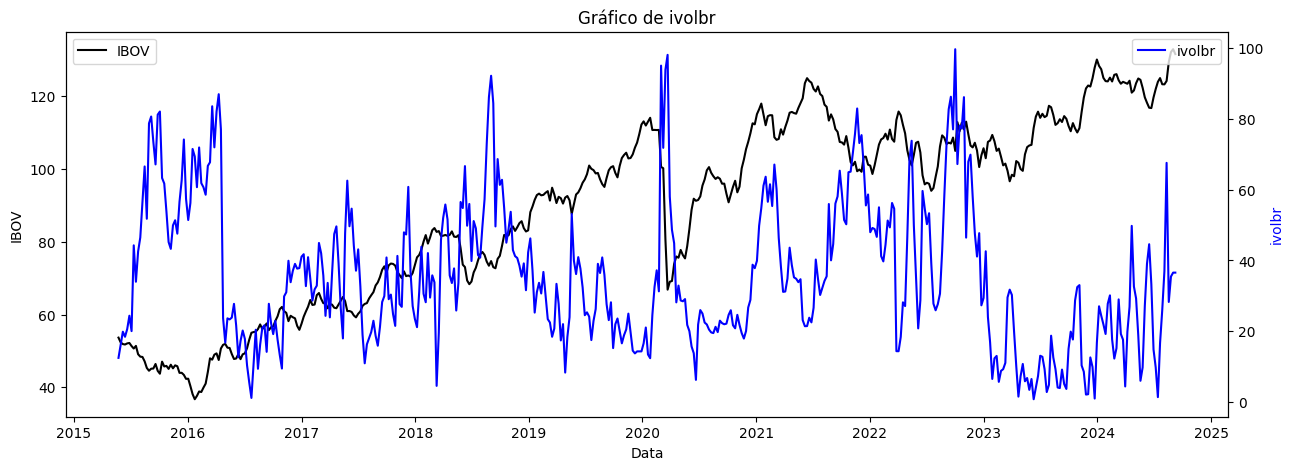

Correlação de Volume: 0.4120293893248289


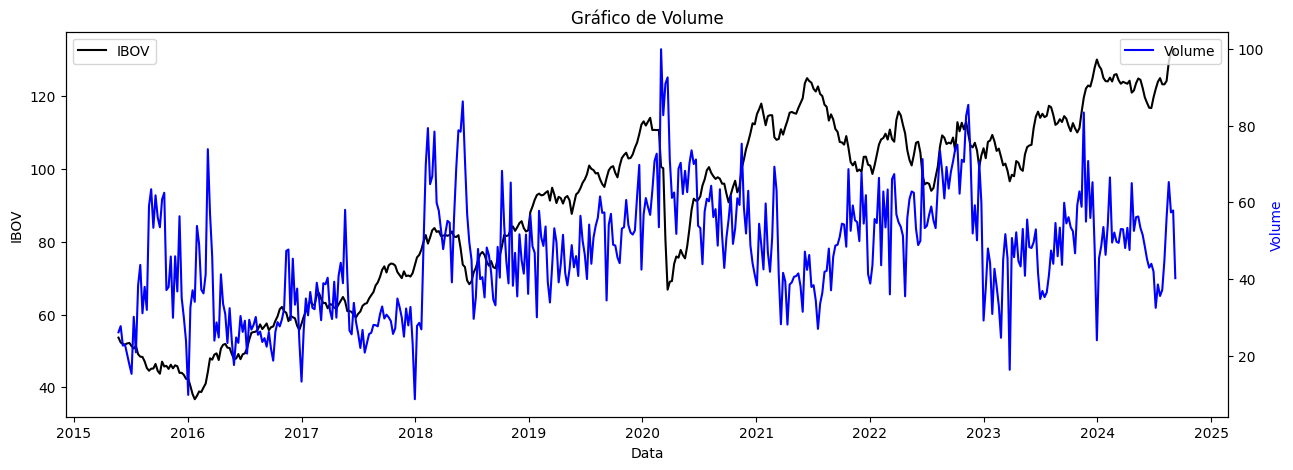

Correlação de Signal: 0.3455809922107936


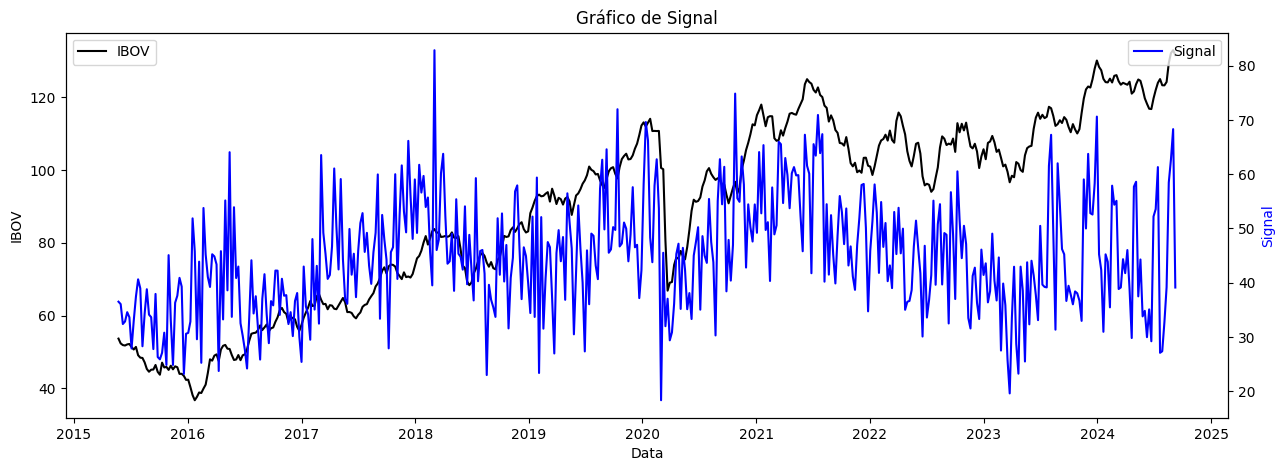

Correlação de RSI_14: 0.13021368089566876


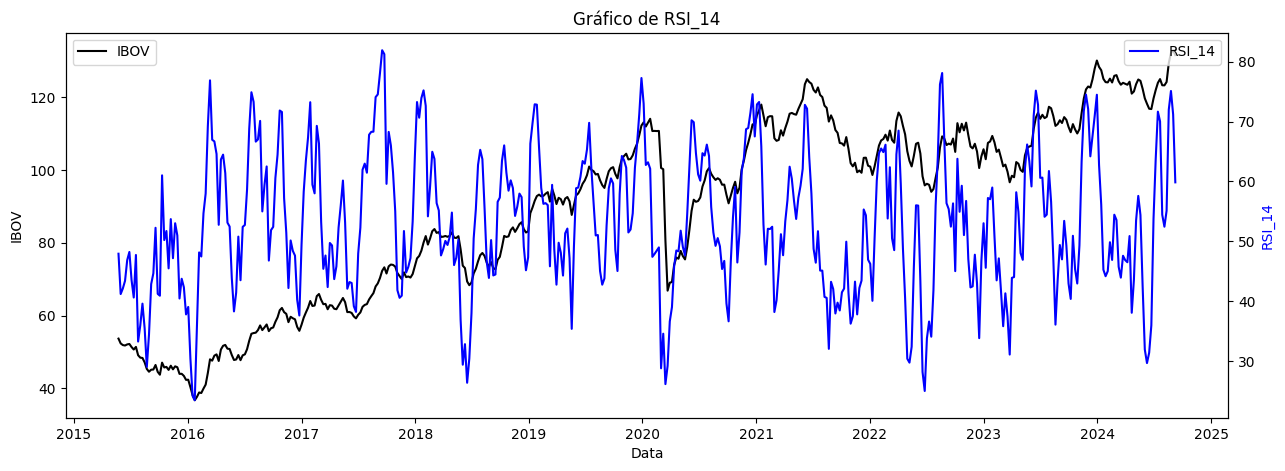

Correlação de trends: 0.7594894684543885


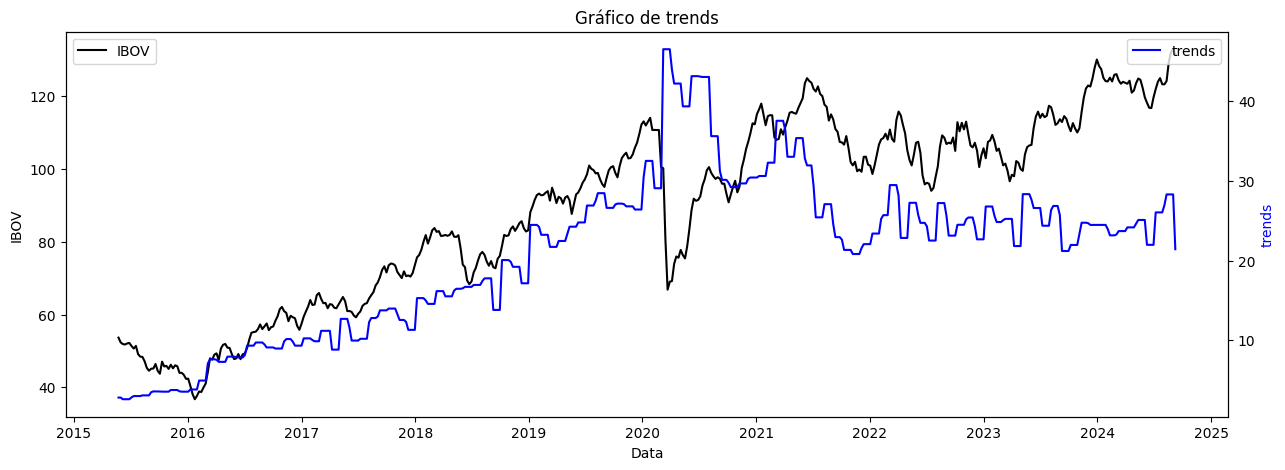

In [104]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Supõe-se que 'df' já está carregado e contém uma coluna 'Data' e as colunas que você deseja analisar
ticker = 'BOVA11.SA'

# Baixa os dados históricos do ticker no Yahoo Finance
dados = yf.download(ticker, start=df.index.min(), end=df.index.max())[['Adj Close']]

# Faz o merge das tabelas com base na data mais próxima
df_total = pd.merge_asof(dados, df, left_index=True, right_index=True)

df_total = df_total.resample("W").mean()

def grafico(coluna):
    fig, ax = plt.subplots(figsize=(15, 5))

    # Calcula a correlação entre o indicador e o 'Adj Close'
    correlacao = df_total[coluna].corr(df_total['Adj Close'])
    print(f"Correlação de {coluna}: {correlacao}")

    # Plota o gráfico
    ax2 = ax.twinx()
    ax.plot(df_total['Adj Close'], color='black', label='IBOV')
    ax2.plot(df_total[coluna], color='blue', label=coluna)

    ax.set_xlabel('Data')
    ax.set_ylabel('IBOV', color='black')
    ax2.set_ylabel(coluna, color='blue')

    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.title(f"Gráfico de {coluna}")
    plt.show()

# Chamadas para as diferentes colunas
grafico("ivolbr")
grafico("Volume")
grafico("Signal")
grafico("RSI_14")
grafico("trends")